In [2]:
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio

In [7]:
def noise(im,br):
    """ Cette fonction ajoute un bruit blanc gaussier d'ecart type br
       a l'image im et renvoie le resultat"""
    imt=np.float32(im.copy())
    sh=imt.shape
    bruit=br*np.random.randn(*sh)
    imt=imt+bruit
    return imt
def quantize(im,n=2):
    """
    Renvoie une version quantifiee de l'image sur n (=2 par defaut) niveaux  
    """
    imt=np.float32(im.copy())
    if np.floor(n)!= n or n<2:
        raise Exception("La valeur de n n'est pas bonne dans quantize")
    else:
        m=imt.min()
        M=imt.max()
        imt=np.floor(n*((imt-m)/(M-m)))*(M-m)/n+m
        imt[imt==M]=M-(M-m)/n #cas des valeurs maximales
        return imt
def seuil(im,s):
    """ renvoie une image blanche(255) la ou im>=s et noire (0) ailleurs.
    """
    imt=np.float32(im.copy())
    mask=imt<s
    imt[mask]=0
    imt[~mask]=255
    return imt
def gradx(im):
    "renvoie le gradient dans la direction x"
    imt=np.float32(im)
    gx=0*imt
    gx[:,:-1]=imt[:,1:]-imt[:,:-1]
    return gx
def view_spectre(im,option=1,hamming=False):
    """ affiche le spectre d'une image
     si option =1 on affiche l'intensite de maniere lineaire
     si option =2 on affiche le log
     si hamming=True (defaut False) alors une fenetre de hamming est appliquee avant de prendre la transformee de Fourier
     """
    imt=np.float32(im.copy())
    (ty,tx)=im.shape
    pi=np.pi
    if hamming:
        XX=np.ones((ty,1))@(np.arange(0,tx).reshape((1,tx)))
        YY=(np.arange(0,ty).reshape((ty,1)))@np.ones((1,tx))
        imt=(1-np.cos(2*pi*XX/(tx-1)))*(1-np.cos(2*pi*YY/(ty-1)))*imt
    aft=np.fft.fftshift(abs(np.fft.fft2(imt)))
    
    if option==1:
        plt.imshow(aft, cmap='gray')
    else:
        plt.imshow(np.log(0.1+aft), cmap='gray')

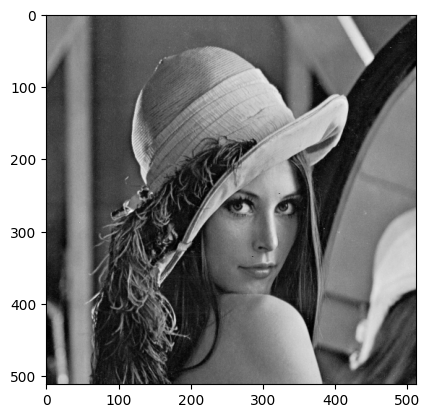

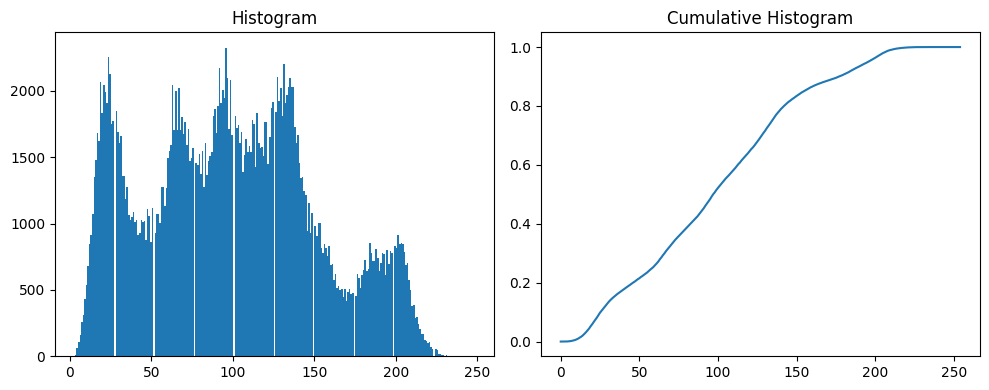

In [4]:
im=skio.imread('images/lena.tif')
plt.imshow(im, cmap='gray')
im=np.float32(im)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(im.reshape((-1,)),bins=255) 
plt.title('Histogram')

(histo,bins)=np.histogram(im.reshape((-1,)),np.arange(0,256)) 
histo=histo/histo.sum()
histocum=histo.cumsum()
plt.subplot(1, 2, 2)
plt.plot(histocum)
plt.title('Cumulative Histogram')

plt.tight_layout()
plt.show()

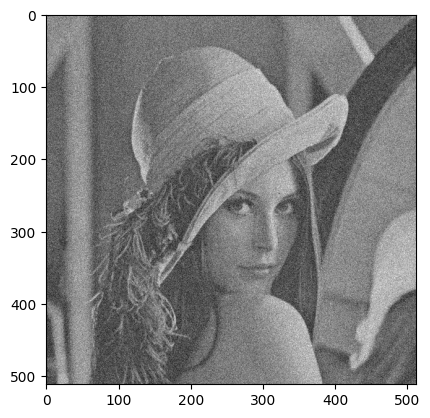

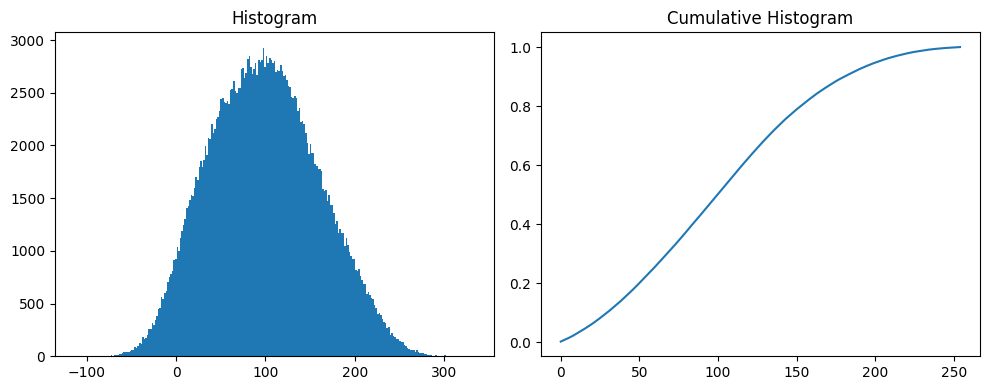

In [40]:
# Ajout de bruit
imbr=noise(im,30)

plt.imshow(imbr, cmap='gray')

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(imbr.reshape((-1,)),bins=255) 
plt.title('Histogram')

(histo,bins)=np.histogram(imbr.reshape((-1,)),np.arange(0,256)) 
histo=histo/histo.sum()
histocum=histo.cumsum()
plt.subplot(1, 2, 2)
plt.plot(histocum)
plt.title('Cumulative Histogram')

plt.tight_layout()
plt.show()

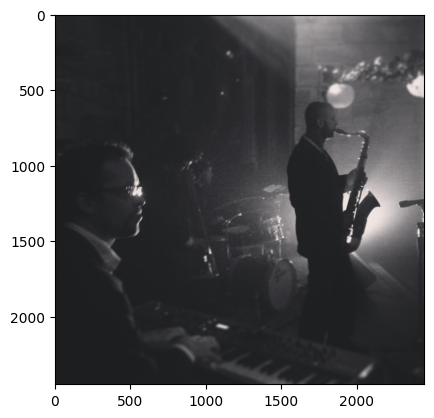

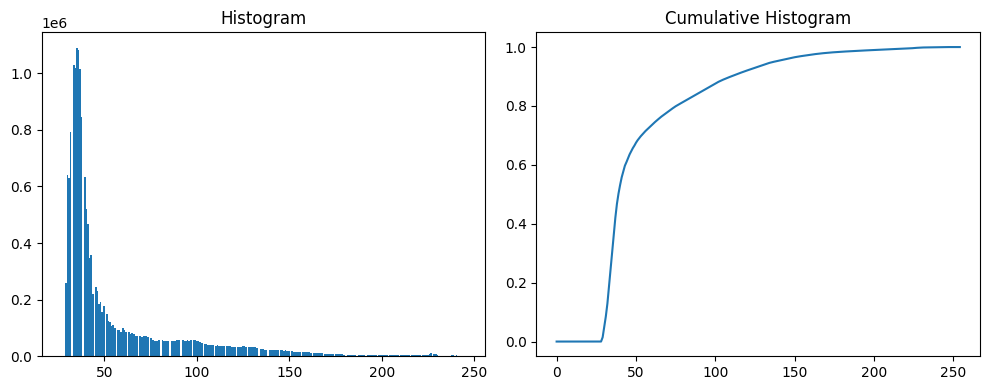

In [6]:
im=plt.imread('images/sombre.jpg')
plt.imshow(im, cmap='gray')
im=np.float32(im)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(im.reshape((-1,)),bins=255) 
plt.title('Histogram')

(histo,bins)=np.histogram(im.reshape((-1,)),np.arange(0,256)) 
histo=histo/histo.sum()
histocum=histo.cumsum()
plt.subplot(1, 2, 2)
plt.plot(histocum)
plt.title('Cumulative Histogram')

plt.tight_layout()
plt.show()



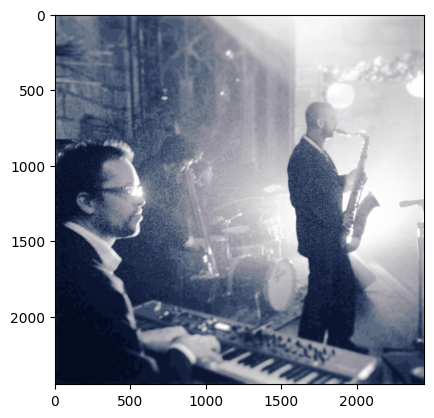

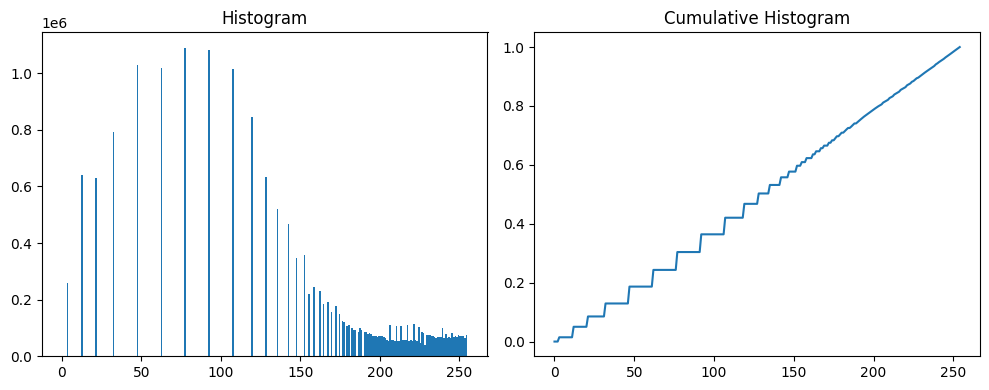

In [7]:
# Egalisation d'histogramme
imequal=histocum[np.uint8(im)]
plt.imshow(imequal, cmap='gray')
imequal = imequal*255

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(imequal.reshape((-1,)),bins=255) 
plt.title('Histogram')

(histo,bins)=np.histogram(imequal.reshape((-1,)),np.arange(0,256)) 
histo=histo/histo.sum()
histocum=histo.cumsum()
plt.subplot(1, 2, 2)
plt.plot(histocum)
plt.title('Cumulative Histogram')

plt.tight_layout()
plt.show()

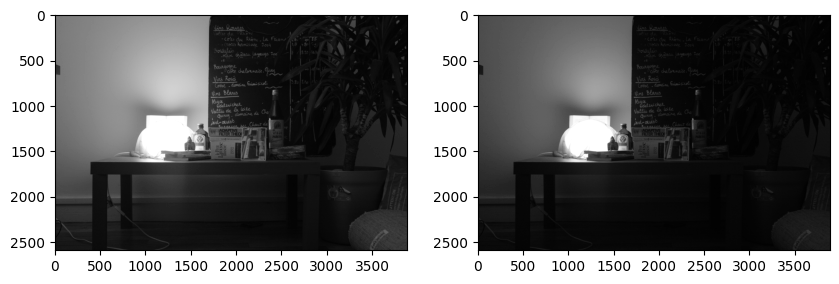

In [8]:
u=skio.imread('images/vue1.tif')
v=skio.imread('images/vue2.tif')

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(u, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(v, cmap='gray')

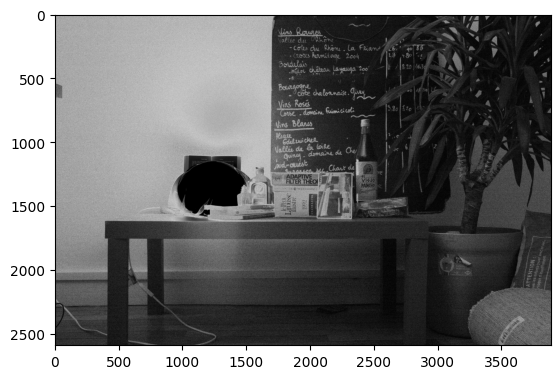

In [10]:
plt.imshow(abs(np.float32(u)-np.float32(v)),cmap='gray')

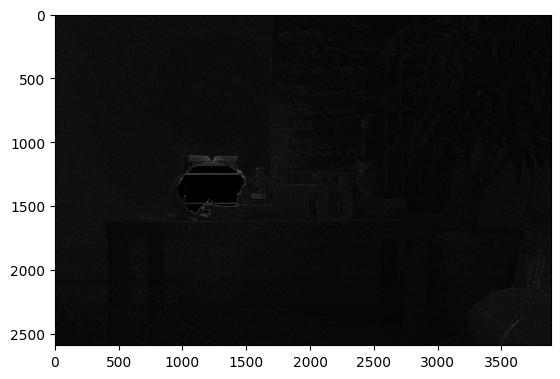

In [14]:
ushape=u.shape
uligne=u.reshape((-1,)) #transforme en ligne
vligne=v.reshape((-1,))
ind=np.argsort(uligne)
unew=np.zeros(uligne.shape,uligne.dtype)
unew[ind]=np.sort(vligne)
# on remet a la bonne taille
unew=unew.reshape(ushape)
#plt.imshow(unew,cmap='gray')
plt.imshow(abs(np.float32(unew)-np.float32(v)),cmap='gray')

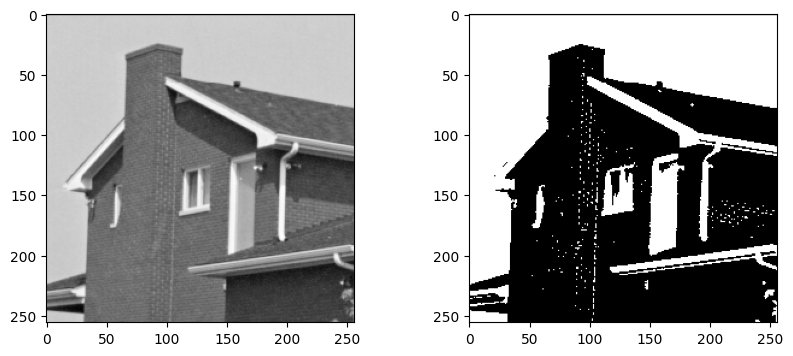

In [16]:
# Quantification dithering 

im=skio.imread('images/maison.tif')
im2=quantize(im,2)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(im2, cmap='gray')

Text(0.5, 1.0, 'Seuillage avec bruit')

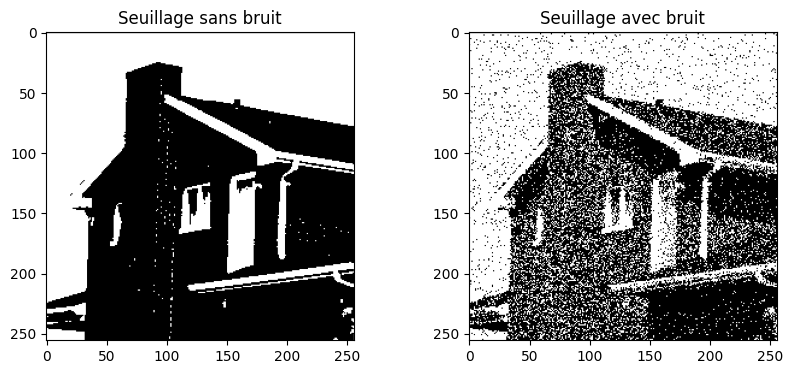

In [22]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(seuil(im,128), cmap='gray')
plt.title('Seuillage sans bruit')
plt.subplot(1, 2, 2)
plt.imshow(seuil(noise(im,40),128), cmap='gray')
plt.title('Seuillage avec bruit')

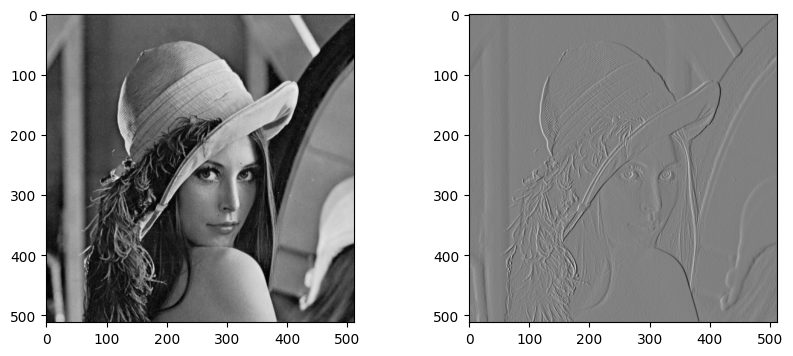

In [35]:
im=skio.imread('images/lena.tif')
im=np.float32(im)
im2=gradx(im)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(im2, cmap='gray')

C:\Users\m\AppData\Local\Temp\ipykernel_15572\3369722260.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.histogram(gradx(im),255)[0]))


Text(0.5, 1.0, 'log of histogram')

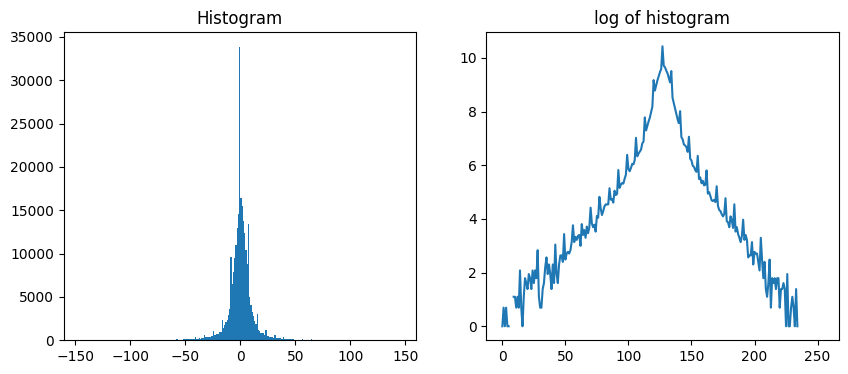

In [38]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(im2.reshape((-1,)),bins=255) 
plt.title('Histogram')

plt.subplot(1, 2, 2)
plt.plot(np.log(np.histogram(gradx(im),255)[0]))
plt.title('log of histogram')

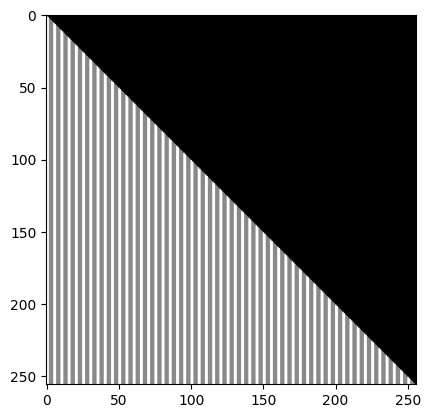

In [4]:
im=skio.imread('images/rayures.tif')
plt.imshow(im, cmap='gray')


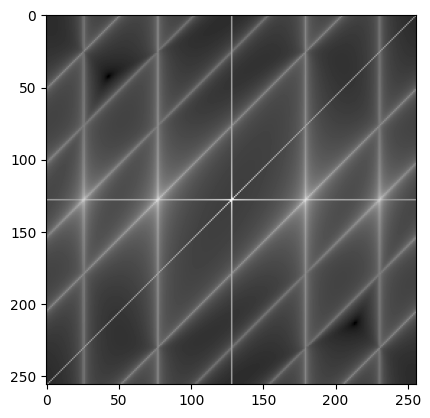

In [10]:
view_spectre(im,option=2,hamming=False)

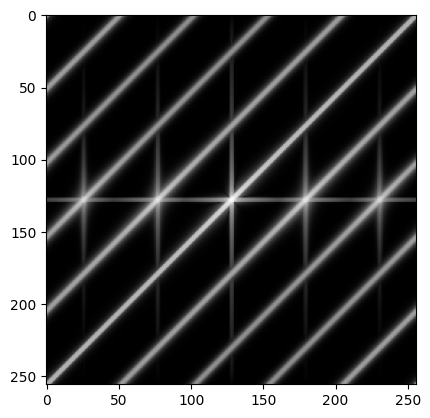

In [11]:
view_spectre(im,option=2,hamming=True)